# Dataset :- Haberman's Survival Data

###  Description :-  
The dataset contains cases from a study that was conducted between 1958 and  1970  at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

#### No of Instances = 306
#### No of Attributes = 4






### Attributes Information :-

 A)  Age of patient at time of operation (numerical)
 B) Patient's year of operation (year - 1900, numerical)
 C) Number of positive axillary nodes detected (numerical)
 D) Survival status (   **CLASS LABEL** )  1 = the patient survived 5 years or longer           2 = the patient died within 5 year

#### Importing the Libraries

In [2]:
import numpy as np               # Linear Algebra Library for Scientific Computing
import pandas as pd              # Pandas - Python Data Analysis Library
import matplotlib.pyplot as plt  # Plotting Library
import seaborn as sns            # Python Visualization Library based on matplotlib

%matplotlib inline             


####  Loading The Dataset

In [3]:
dataset = pd.read_csv('haberman.csv',names=['Age','Operation_Year','Axil_nodes','Survival_Status'])

In [4]:
# Checking First 10 entries of Dataset
dataset.head(10)

,Age,Operation_Year,Axil_nodes,Survival_Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


#### Observation :- 
Since in the Survival_Status ,Data given is numerical , So it will be of no use  to plot Graphs with Survival_Status as *'hue'* Parameter

#### So Converting numerical Data of Survival_Status into Catergorical Data

In [5]:
dataset['Survival_Status'] = dataset['Survival_Status'].map(lambda a:'True' if a==1 else 'False')

In [6]:
# Again Checking top 10 elements in  Dataset
dataset.head(10)

,Age,Operation_Year,Axil_nodes,Survival_Status
0,30,64,1,True
1,30,62,3,True
2,30,65,0,True
3,31,59,2,True
4,31,65,4,True
5,33,58,10,True
6,33,60,0,True
7,34,59,0,False
8,34,66,9,False
9,34,58,30,True


### High level Statistics

In [7]:
# Checking Column names of Dataset of the Dataset
print(dataset.columns)

Index(['Age', 'Operation_Year', 'Axil_nodes', 'Survival_Status'], dtype='object')


In [8]:
# Getting Description of our Dataset

dataset.describe()

,Age,Operation_Year,Axil_nodes
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


In [9]:
# Checking Shape of the Dataset :- (nrows,ncols)
dataset.shape

(306, 4)

In [10]:
# Class Labels
dataset['Survival_Status'].unique()
# 2 Class Labels

array(['True', 'False'], dtype=object)

In [11]:
# No of Data points belonging to each Class Label
dataset['Survival_Status'].value_counts()

True     225
False     81
Name: Survival_Status, dtype: int64

### Conclusion :- 
This is an Imbalanced DataSet because no of Data points belonging to Each Class Label are not same(Or almost same).

#### Objective:- 

In the Dataset we are given 3 features of the patient and 1 class label..

The features are : 1) Age_of_patient
                   2) Operation_year
                   3) Axil_nodes
                  
Class Label is :-  Survival_Status                
                  
Based on the given Features of a patient..Classify whether after operation he would have survied :
 1 -  if Patient lived 5 years or longer.
 2 - if Patient Died with in 5 years.

### UNIVARIATE ANALYSIS

In [12]:
# Splitting the Data Based Of their Class Label
survived = dataset.loc[dataset['Survival_Status'] == 'True']
not_survived = dataset.loc[dataset['Survival_Status'] == 'False']

Text(0.5,1,"DistPlot for 'Age'")

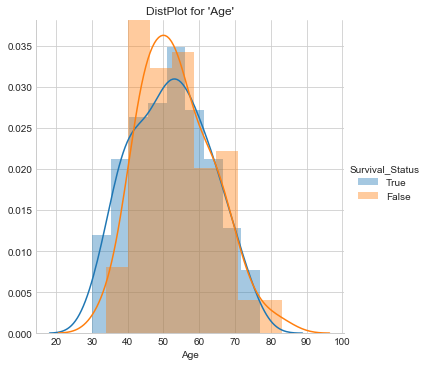

In [13]:
# Plotting Distribution Plot based on each Feature of the Patient

#Distribution Plot for Age Feature
sns.set_style("whitegrid")
sns.FacetGrid(dataset,hue='Survival_Status',size=5)\
.map(sns.distplot,'Age').add_legend()
plt.title("DistPlot for 'Age'")

In [1]:
#Distribution Plot for Operation_year Feature
sns.set_style("whitegrid")
sns.FacetGrid(dataset,hue='Survival_Status',size=5)\
.map(sns.distplot,'Operation_Year').add_legend()
plt.title("DistPlot for 'Operation Year'")

NameError: name 'sns' is not defined

Text(0.5,1,"DistPlot for 'Axil_nodes'")

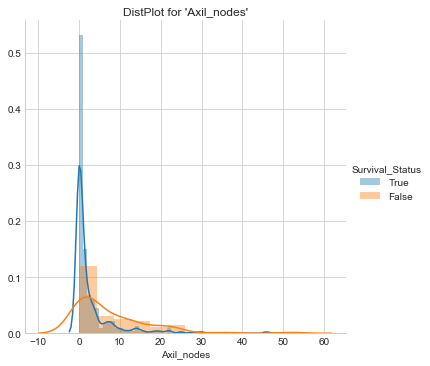

In [15]:
#Distribution Plot for Axil_nodes Feature
sns.set_style("whitegrid")
sns.FacetGrid(dataset,hue='Survival_Status',size=5)\
.map(sns.distplot,'Axil_nodes').add_legend()
plt.title("DistPlot for 'Axil_nodes'")

### Conclusion :-  

   

1) While the "Age" and "Operation_year" features are not much useful,But "Axial_nodes" feature shows its effect

2)  If patient's age <40 ,there is a high chance of Patients Survival for more than 5 years

3) If patient had operation between year (60 and 63) or (66 to 67) ,then there is a high chance of Patients Survival.

4) In the Distribution Plot of "Axial_nodes" , The no of Patients having Axial_node =(0 to 2) , Tends to survive.. else there are more chances of patient to Die with in Five Years

5) We can use if else condition to predict the Patients Survival Status :

Text(0.5,1,'Survival_Status vs Axil_nodes')

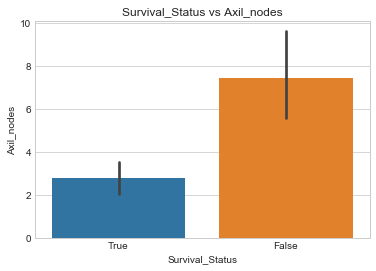

In [16]:
# Barplot (Aggregates the Categorical Data(Survival_Status) based of some Function(By default - mean()))
sns.set_style("whitegrid")
sns.barplot(x='Survival_Status',y='Axil_nodes',data=dataset)
plt.title("Survival_Status vs Axil_nodes")


Text(0.5,1,'Survival_Status vs Age')

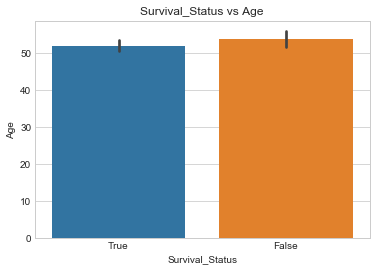

In [17]:
sns.set_style("whitegrid")
sns.barplot(x='Survival_Status',y='Age',data=dataset)
plt.title("Survival_Status vs Age")

Text(0.5,1,'Survival_Status vs Operation Year')

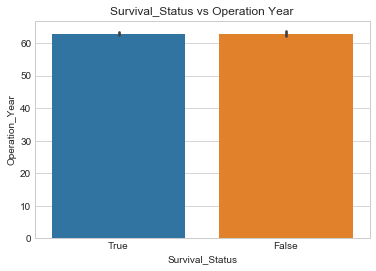

In [18]:
sns.set_style("whitegrid")
sns.barplot(x='Survival_Status',y='Operation_Year',data=dataset)
plt.title("Survival_Status vs Operation Year")

### Conclusion :-

 **The mean of Axil_nodes of the patients who Died before 5 Years are is comparatively Large than those patients whose Axil_nodes mean was less.**

** So Targeting the Axil_node feature and Performing more Analysis**

In [19]:
#  Lets Check the description of Survived and not_survived Patients

In [20]:
#CHECKING DESCRIPTION OF OUR SURVIVED PATIENTS
survived.describe()

,Age,Operation_Year,Axil_nodes
count,225.000000,225.000000,225.000000
mean,52.017778,62.862222,2.791111
std,11.012154,3.222915,5.870318
min,30.000000,58.000000,0.000000
25%,43.000000,60.000000,0.000000
50%,52.000000,63.000000,0.000000
75%,60.000000,66.000000,3.000000
max,77.000000,69.000000,46.000000


In [21]:
#CHECKING DESCRIPTION OF OUR NOT_SURVIVED PATIENTS
not_survived.describe()

,Age,Operation_Year,Axil_nodes
count,81.000000,81.000000,81.000000
mean,53.679012,62.827160,7.456790
std,10.167137,3.342118,9.185654
min,34.000000,58.000000,0.000000
25%,46.000000,59.000000,1.000000
50%,53.000000,63.000000,4.000000
75%,61.000000,65.000000,11.000000
max,83.000000,69.000000,52.000000


### Conclusion :-  
 1) Since Data Points in Survived Dataset = 225
 
 2)  Data Points in not_Survived Dataset = 81
 
 3) 75% of Survived Patient have Axil_nodes<=3 and 75% of not_Survived Patient have Axil_nodes <=11
    So,it seems that the most important feature turns out to be Axil_nodes
 
 3)  mean of not_Survived Axil_nodes >> mean of Survived Axil_nodes; it Shows that there is a relation between no of Axil_nodes and Survival_Status


In [22]:
# Plotting PDF(Probability Density Function) and CDF(Cumulative Distribution Function)

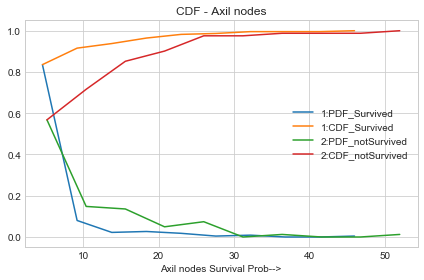

In [23]:
sns.set_style("whitegrid")
#Survived
count , bin_edge = np.histogram(survived['Axil_nodes'],bins=10,density=True)
pdf = count/sum(count)
cdf= np.cumsum(pdf)
plt.plot(bin_edge[1:],pdf)
plt.plot(bin_edge[1:],cdf)

#not_Survived
count , bin_edge = np.histogram(not_survived['Axil_nodes'],bins=10,density=True)
pdf = count/sum(count)
cdf= np.cumsum(pdf)
plt.plot(bin_edge[1:],pdf)
plt.plot(bin_edge[1:],cdf)
plt.legend(['1:PDF_Survived' , '1:CDF_Survived','2:PDF_notSurvived' , '2:CDF_notSurvived'],loc='center right')
plt.xlabel("Axil nodes Survival Prob-->")
plt.title("CDF - Axil nodes")
plt.tight_layout()

In [24]:
#MEDIANS

print("Medians ")
print("Survived --> ",np.median(survived['Axil_nodes']))
print("Not Survived --> ",np.median(not_survived['Axil_nodes']))

print("\nMEdian Absolute Deviation")
from statsmodels import robust
print("Survived --> ",robust.mad(survived['Axil_nodes']))
print("Not Survived --> ",robust.mad(not_survived['Axil_nodes']))

Medians 
Survived -->  0.0
Not Survived -->  4.0

MEdian Absolute Deviation
Survived -->  0.0
Not Survived -->  5.93040887402


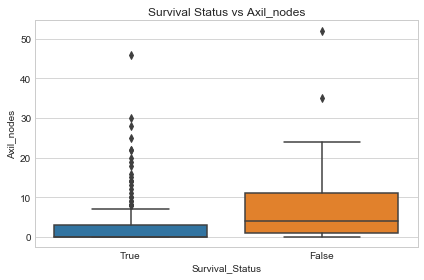

In [30]:
# Boxplot
sns.boxplot(x = 'Survival_Status',y = 'Axil_nodes',data =dataset)
plt.title("Survival Status vs Axil_nodes")
plt.tight_layout()

### Conclusion:- 

 1) When TRUE, the interquartile range of Axil_nodes is 3 (from above survived.describe()) 

 2) When False, the interquartile range of Axil_nodes is 10 (from above not_survived.describe()) 
 
 3) IQR of the not_survived dataset >> IQR of the survived dataset
 
 4)  median(not_survived dataset) >> median(survived dataset)

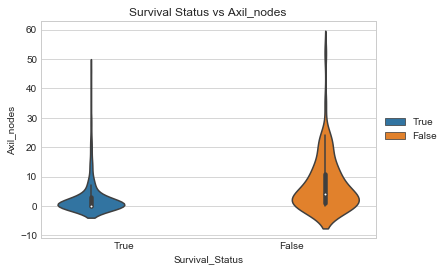

In [26]:
# Violin Plot
sns.violinplot(x = 'Survival_Status',y = 'Axil_nodes',data =dataset,hue='Survival_Status')
plt.title("Survival Status vs Axil_nodes")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

### Conclusion:- 

####  We can build a model based on Axil_nodes as 
         if(Axil_nodes <3):
             then survived
         else:
             not_survived
             
#### But the model Based on above condition will not be efficient because Values of Axil nodes are random

### BIVARIATE ANALYSIS

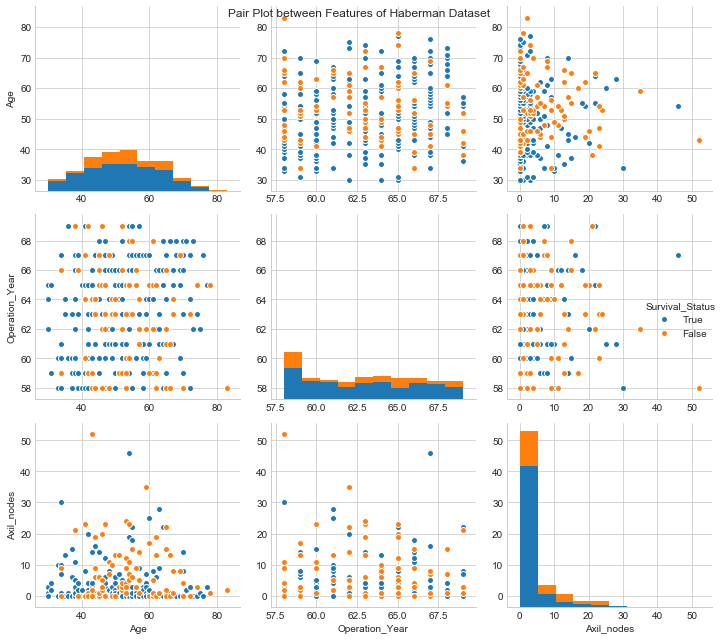

In [27]:
# PAIRPLOT
sns.pairplot(data = dataset,hue = 'Survival_Status',kind ='scatter',size=3)
plt.suptitle("Pair Plot between Features of Haberman Dataset")
plt.tight_layout()


### Conclusion:-

##### The Graph of Operation_Year vs Axil_Nodes did a better job a seperating the Class Labels

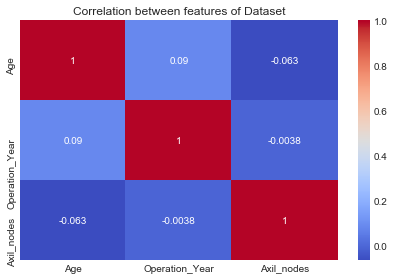

In [28]:
# Correlation Using Heatmap
sns.heatmap(dataset.corr(),cmap='coolwarm',annot=True)
plt.title("Correlation between features of Dataset")
plt.tight_layout()

# Final Result :-

1) The main feature which turned out to be important is Axil_nodes because rest Features Have more Overlapping.

2) The Correlation between features is very less

3) This Dataset is imbalanced so Prediction of Survival_Status is Difficult .

4) This Dataset is not linear seperable hence it would be very difficult to build model using if else condition.